## DBSCAN Algorithm 
Density-Based Spatial Clustering of Applications with Noise

In [14]:
# libraries
import pandas as pd
import numpy as np
import sys

# modelling - dbscan
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors

# visulaization
import matplotlib.pyplot as plt

# Calling functions 
sys.path.insert(0, '../src/utils/')
import dbscan

In [5]:
# Reading data 
# data = pd.read_csv('../data/featsel/Citywide_Survey_featsel.csv')

#testing on dummy data 
data = np.random.rand(100, 2)

In [10]:
# Instantiate the DBSCAN object
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(data)

In [11]:
# Extract the core sample indices and the labels
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

### Generating a k-dist Graph to Determine eps for DBSCAN

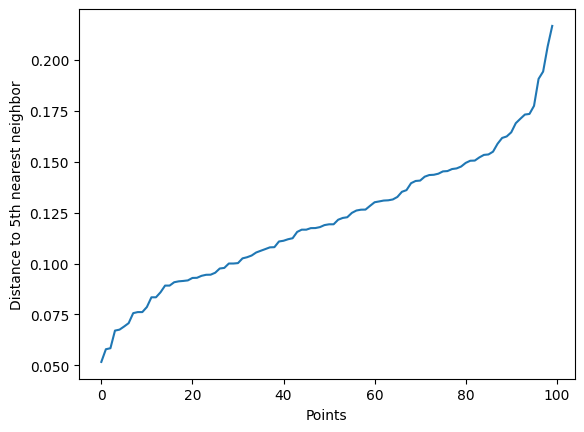

In [15]:
# Compute the distances between each point and its 5th nearest neighbor
k = 5
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(data)
distances, indices = neigh.kneighbors(data)
distances = np.sort(distances[:,k-1], axis=0)

# Plot the distances
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distance to 5th nearest neighbor')
plt.show()
